In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, fbeta_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv('../MelbourneHousing/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
# sum of null values in each column
df.isnull().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
df['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: YearBuilt, Length: 144, dtype: int64

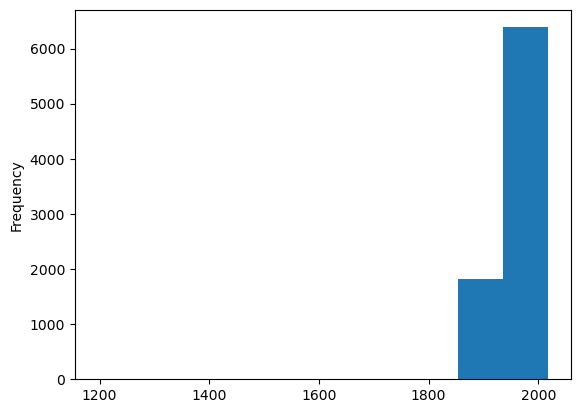

In [8]:
# plot hte distribution of YearBuilt
df['YearBuilt'].plot(kind='hist')
plt.show()

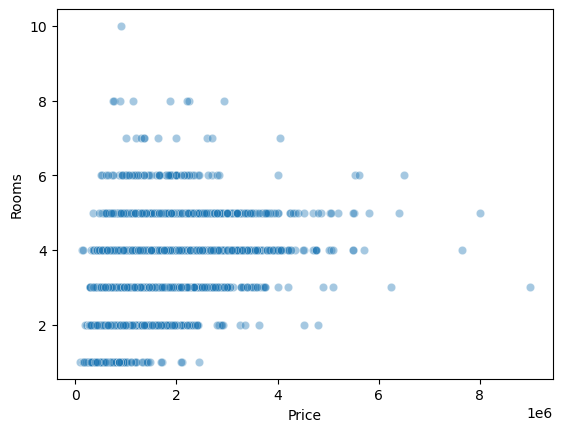

In [9]:
# plot correlation between Rooms and Price using a seaborn scatterplot
sns.scatterplot(x='Price', y='Rooms', data=df, alpha=0.4)
plt.show()

## Selecting Data for Modeling

In [10]:
# first drop rows with too many null values (more than 1000 null values)
df = df.dropna(axis=0)

In [11]:
# prediction target
y = df['Price']

### Choosing Feautures

In [12]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [13]:
X = df[melbourne_features]

In [14]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       6196 non-null   int64  
 1   Bathroom    6196 non-null   float64
 2   Landsize    6196 non-null   float64
 3   Lattitude   6196 non-null   float64
 4   Longtitude  6196 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 290.4 KB


Building the model

The steps to building and using a model are:

* Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* Fit: Capture patterns from provided data. This is the heart of modeling.
* Predict: Just what it sounds like
* Evaluate: Determine how accurate the model's predictions are.

In Sample model building

In [16]:
# define model
df_model = DecisionTreeRegressor(random_state=1)

# fit model
df_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [17]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(df_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [18]:
y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

In [19]:
predictions = df_model.predict(X)

Use model validation to measure the quality of your model. Measuring model quality is the key to iteratively improving your models.
* the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.
* Mean Absolute Error / MAE: error = actual - predicted
* In plain english: On average, our predictions are off by about X.

In [20]:
mean_absolute_error(y, predictions)

1115.7467183128902

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

In [21]:
# split data into training and validation data, for both features and target
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

# define model
df_model = DecisionTreeRegressor()

# fit model
df_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = df_model.predict(test_X)
print(mean_absolute_error(test_y, val_predictions))

273155.7938454917


## Underfitting and Overfitting

* <b>Overfitting</b>: where a model matches the training data almost perfectly, but does poorly in validation and other new data.
* <b>Underfitting</b>: When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting.

<img src="https://storage.googleapis.com/kaggle-media/learn/images/AXSEOfI.png" alt="curve" style="width: 500px;"/>

 max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes

In [22]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

In [23]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


In this case the best value for max_leaf_nodes is 500.

# Random Forests

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

<b>Random Forest</b> uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

207190.6873773146


## Missing Values

In [26]:
df = pd.read_csv('../MelbourneHousing/melb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [27]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [28]:
y = df['Price']

# use only numeric predictors
melbourne_features = df.drop(['Price'], axis=1)
X = melbourne_features.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [29]:
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

### Drop missing values

In [30]:
# get columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

MAE from Approach 1 (Drop columns with missing values):
190103.4833456063


### Imputation

In [31]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_test.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE from Approach 2 (Imputation):
183941.92803141873


Extension to imputation

In [32]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_test.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_test))

MAE from Approach 3 (An Extension to Imputation):
183608.44122484044


# Categorical Values

In [33]:
y = df['Price']

X = df.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [34]:
# drop columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()] 
X_train.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_valid = X_test[my_cols].copy()

In [35]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Type', 'Method', 'Regionname']


In [36]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Type', 3), ('Method', 5), ('Regionname', 8)]

In [37]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_test))

MAE from Approach 1 (Drop categorical variables):
190103.4833456063


In [38]:
# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_test))

MAE from Approach 2 (Ordinal Encoding):
179863.5191335297


For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset. For this reason, we typically will only one-hot encode columns with relatively low cardinality. Then, high cardinality columns can either be dropped from the dataset, or we can use ordinal encoding.

In [39]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_test))

MAE from Approach 3 (One-Hot Encoding):
179141.82005400097


# Pipelines

Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

* Cleaner Code: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.
* Fewer Bugs: There are fewer opportunities to misapply a step or forget a preprocessing step.
* Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.
* More Options for Model Validation: You will see an example in the next tutorial, which covers cross-validation.

In [40]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
6941,h,S,Northern Metropolitan,2,12.4,3060.0,2.0,1.0,621.0,-37.71640,144.96660,5070.0
12969,h,S,Western Metropolitan,4,7.5,3040.0,4.0,4.0,543.0,-37.74633,144.89644,9264.0
10653,h,SP,South-Eastern Metropolitan,5,27.0,3196.0,5.0,6.0,900.0,-38.04105,145.12160,2546.0
11652,h,PI,Eastern Metropolitan,3,16.1,3111.0,3.0,1.0,726.0,-37.80279,145.19974,4790.0
4871,h,S,Southern Metropolitan,3,4.5,3181.0,3.0,2.0,112.0,-37.85170,145.00560,7717.0


Define Preprocessing Steps <br>
Similar to how a pipeline bundles together preprocessing and modeling steps, we use the ColumnTransformer class to bundle together different preprocessing steps. The code below:

* imputes missing values in numerical data, and
* imputes missing values and applies a one-hot encoding to categorical data.

In [41]:
# preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, object_cols)
    ])

In [42]:
# define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

With the pipeline, we preprocess the training data and fit the model in a single line of code. (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. <br>This becomes especially messy if we have to deal with both numerical and categorical variables!)
With the pipeline, we supply the unprocessed features in X_valid to the predict() command, and the pipeline automatically preprocesses the features before generating predictions. (However, without a pipeline, we have to remember to preprocess the validation data before making predictions.)

In [43]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE:', score)

MAE: 171156.12819727891


In [44]:
def fast_train(model , preprocessor):
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    my_pipeline.fit(X_train, y_train)
    preds = my_pipeline.predict(X_test)
    score = mean_absolute_error(y_test, preds)
    return f'MAE: {score}'


In [45]:
model2 = DecisionTreeRegressor(random_state=1)
print(fast_train(model2, preprocessor))

MAE: 234558.03387334314


# Cross Validation

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces (folds), each 20% of the full dataset.

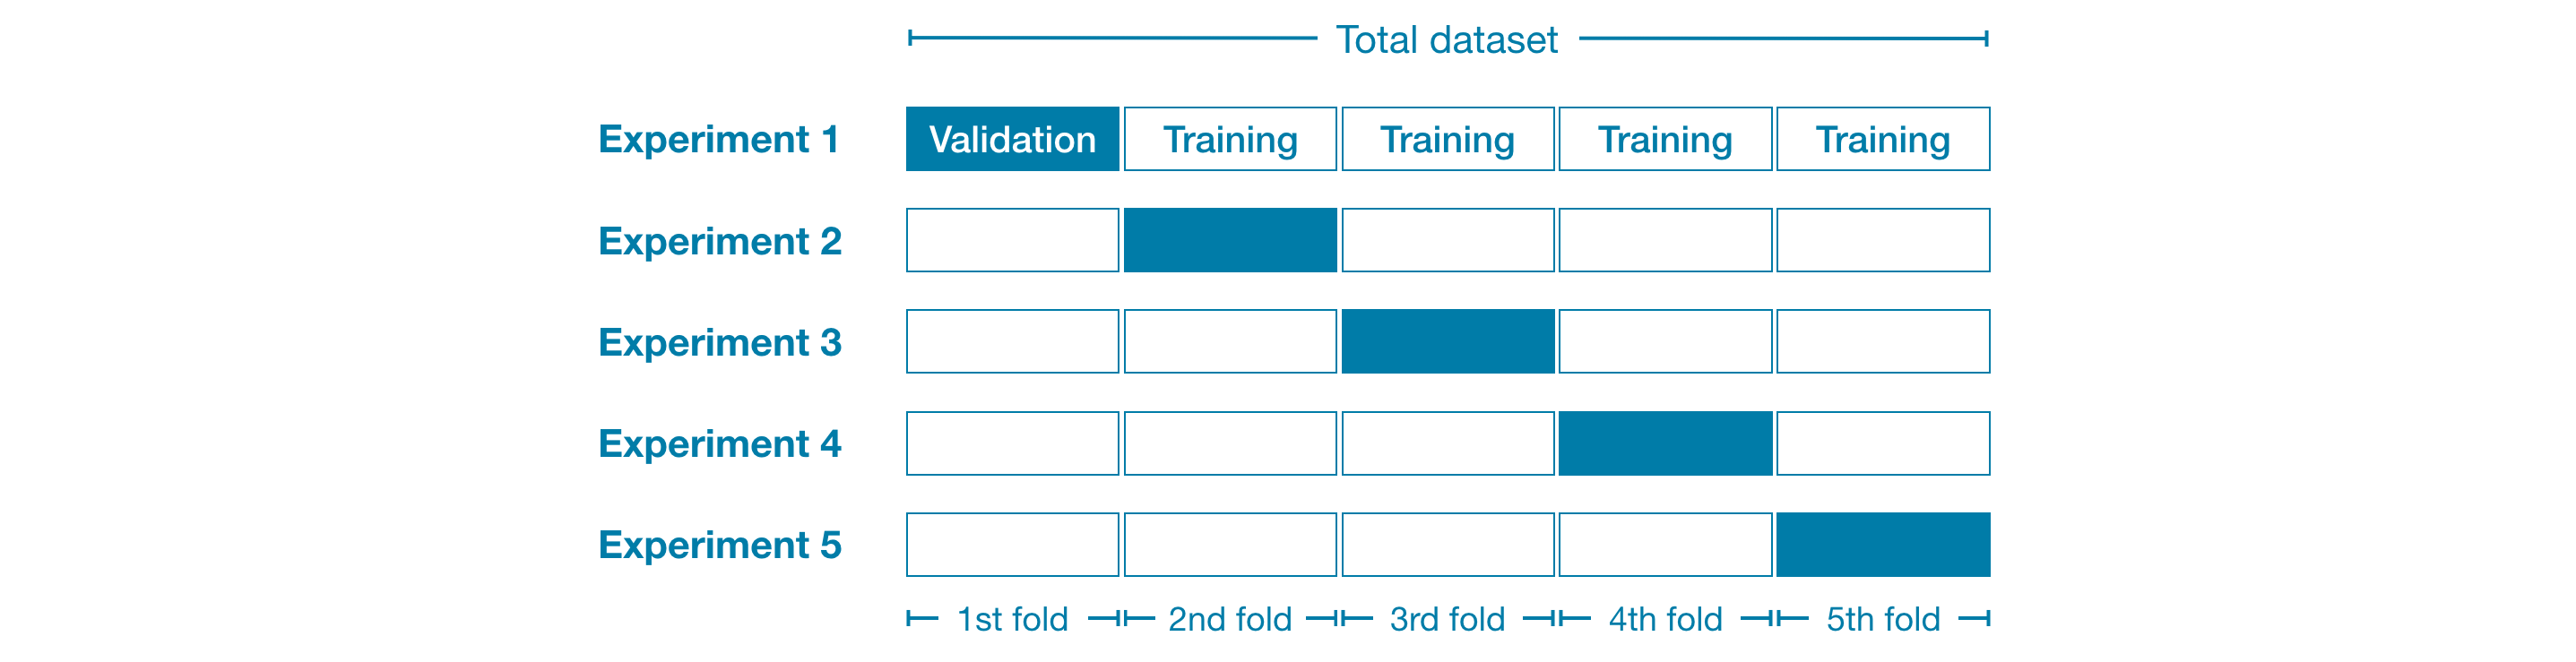

Then, we run one experiment for each fold:

* In Experiment 1, we use the first fold as a validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.
* In Experiment 2, we hold out data from the second fold (and use everything except the second fold for training the model). The holdout set is then used to get a second estimate of model quality.
* We repeat this process, using every fold once as the holdout set. Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).

So, given these tradeoffs, when should you use each approach?

* For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
* For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

In [46]:
# Read the data
df = pd.read_csv('../MelbourneHousing/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = df[cols_to_use]

# Select target
y = df.Price

In [48]:
pipe = Pipeline([('preprocessing', SimpleImputer()), 
                 ('model', RandomForestRegressor(n_estimators=100, random_state=0))])

In [49]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(pipe, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301030.37999702 301815.50787799 285449.9265583  234645.50725674
 259420.38429285]


The scoring parameter chooses a measure of model quality to report: in this case, we chose negative mean absolute error (MAE). The docs for scikit-learn show a list of <a href="http://scikit-learn.org/stable/modules/model_evaluation.html"> options</a>

In [50]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
276472.34119658044


Using cross-validation yields a much better measure of model quality, with the added benefit of cleaning up our code: note that we no longer need to keep track of separate training and validation sets. So, especially for small datasets, it's a good improvement!

In [ ]:
def get_score(n_estimators):
    pipe = Pipeline([('preprocessing', SimpleImputer()), 
                 ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))])
    scores = -1 * cross_val_score(pipe, X, y, cv=3, scoring='neg_mean_absolute_error')
    return scores.mean()
    

Finding optimal estimators for the model

In [47]:
# define the range of values to search over
n_estimators_range = np.arange(50, 301, 50)

# define the parameter grid to search over
param_grid = {'n_estimators': n_estimators_range}

# create a Random Forest Regressor object
rf = RandomForestRegressor()

# create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best value of n_estimators found
print("Best value of n_estimators:", grid_search.best_params_['n_estimators'])


c:\Users\mezam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mezam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mezam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "c:\Users\mezam\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\mezam\anaconda3\lib\sit

ValueError: could not convert string to float: 'h'

In [ ]:
# Finding optimal estimators for the model
def get_mae(n_estimators, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    return mae

# compare MAE with differing values of n_estimators
for n_estimators in [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]:
    my_mae = get_mae(n_estimators, X_train, X_test, y_train, y_test)
    print("n_estimators %d \t\t Mean Absolute Error:  %d" %(n_estimators, my_mae))

# Finding optimal max_depth for the model
def get_mae(max_depth, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    return mae

# compare MAE with differing values of max_depth
for max_depth in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    my_mae = get_mae(max_depth, X_train, X_test, y_train, y_test)
    print("max_depth %d \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))

# Finding optimal max_leaf_nodes for the model
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    return mae

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 25, 50, 75, 100, 125, 150, 175, 200, 225]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("max_leaf_nodes %d \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))



ValueError: could not convert string to float: 'h'